In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
#Read data
df = pd.read_csv('McDonald_s_Reviews.csv', encoding='latin-1')

In [3]:
df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [4]:
df['review'].values[0]

'Why does it look like someone spit on my food?\nI had a normal transaction,  everyone was chill and polite, but now i dont want to eat this. Im trying not to think about what this milky white/clear substance is all over my food, i d*** sure am not coming back.'

In [5]:
print(df.shape)

(33396, 10)


In [6]:
df = df.head(500)
print(df.shape)

(500, 10)


In [7]:
df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


# Quick EDA

In [8]:
df['rating'].value_counts()

1 star     170
5 stars    119
4 stars     83
3 stars     81
2 stars     47
Name: rating, dtype: int64

In [9]:
#replace rating into number
df['rating'].replace ({'1 star': 1, '2 stars':2, '3 stars': 3, '4 stars': 4, '5 stars': 5}, inplace=True)
df['rating'].astype('int')

0      1
1      4
2      1
3      5
4      1
      ..
495    4
496    3
497    4
498    1
499    3
Name: rating, Length: 500, dtype: int32

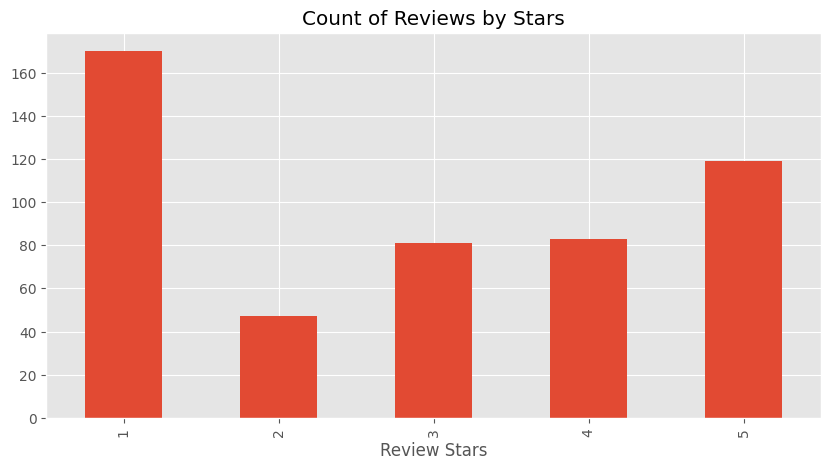

In [10]:
ax = df['rating'].value_counts().sort_index() \
 .plot(kind='bar', title = 'Count of Reviews by Stars', figsize=(10,5))
ax.set_xlabel("Review Stars")
plt.show()

# Basic NLTK

In [11]:
example = df['review'][51]
print(example)

Rude customer service, unprofessional attitude, overcooked food, no complimentary items for screwing up our orders. I don't understand how you can keep your job when there is so many negative reviews. I vow to never eat here again. I would rather eat a cold can of baked beans...


In [12]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Rude',
 'customer',
 'service',
 ',',
 'unprofessional',
 'attitude',
 ',',
 'overcooked',
 'food',
 ',']

In [13]:
#part-of-speech
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Rude', 'NNP'),
 ('customer', 'NN'),
 ('service', 'NN'),
 (',', ','),
 ('unprofessional', 'JJ'),
 ('attitude', 'NN'),
 (',', ','),
 ('overcooked', 'VBD'),
 ('food', 'NN'),
 (',', ',')]

In [14]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [15]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [16]:
#named entity chunker to chunk the given list of tagged tokens (take the token into groups)
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Rude/NNP)
  customer/NN
  service/NN
  ,/,
  unprofessional/JJ
  attitude/NN
  ,/,
  overcooked/VBD
  food/NN
  ,/,
  no/DT
  complimentary/JJ
  items/NNS
  for/IN
  screwing/VBG
  up/RP
  our/PRP$
  orders/NNS
  ./.
  I/PRP
  do/VBP
  n't/RB
  understand/VB
  how/WRB
  you/PRP
  can/MD
  keep/VB
  your/PRP$
  job/NN
  when/WRB
  there/EX
  is/VBZ
  so/RB
  many/JJ
  negative/JJ
  reviews/NNS
  ./.
  I/PRP
  vow/VBP
  to/TO
  never/RB
  eat/VB
  here/RB
  again/RB
  ./.
  I/PRP
  would/MD
  rather/RB
  eat/VB
  a/DT
  cold/JJ
  can/MD
  of/IN
  baked/JJ
  beans/NNS
  .../:)


# VADER Sentiment Scoring
Using the NLTK's SentimentIntensityAnalyzer to get to neg/neu/pos scores of the text

In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer 
from tqdm.notebook import tqdm



In [18]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [19]:
sia = SentimentIntensityAnalyzer ()

In [20]:
#having Sentiment Analysing Object
sia

In [21]:
#test
sia.polarity_scores('it is really interesting')

{'neg': 0.0, 'neu': 0.501, 'pos': 0.499, 'compound': 0.4576}

In [22]:
sia.polarity_scores(example)

{'neg': 0.26, 'neu': 0.687, 'pos': 0.052, 'compound': -0.888}

In [23]:
# Run the polarity score on the entire data chunk (500)
res = {} #dictionary to store the result
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['review']
    myid = row['reviewer_id']
    res[myid] = sia.polarity_scores(text)
    

  0%|          | 0/500 [00:00<?, ?it/s]

In [24]:
res

{1: {'neg': 0.027, 'neu': 0.879, 'pos': 0.094, 'compound': 0.5215},
 2: {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.8687},
 3: {'neg': 0.051, 'neu': 0.949, 'pos': 0.0, 'compound': -0.3535},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.143, 'neu': 0.857, 'pos': 0.0, 'compound': -0.802},
 6: {'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'compound': -0.5267},
 7: {'neg': 0.073, 'neu': 0.911, 'pos': 0.016, 'compound': -0.7748},
 8: {'neg': 0.06, 'neu': 0.889, 'pos': 0.05, 'compound': 0.1027},
 9: {'neg': 0.188, 'neu': 0.812, 'pos': 0.0, 'compound': -0.6901},
 10: {'neg': 0.023, 'neu': 0.633, 'pos': 0.344, 'compound': 0.9942},
 11: {'neg': 0.804, 'neu': 0.196, 'pos': 0.0, 'compound': -0.6249},
 12: {'neg': 0.143, 'neu': 0.795, 'pos': 0.062, 'compound': -0.5522},
 13: {'neg': 0.217, 'neu': 0.711, 'pos': 0.073, 'compound': -0.9319},
 14: {'neg': 0.159, 'neu': 0.787, 'pos': 0.054, 'compound': -0.6597},
 15: {'neg': 0.085, 'neu': 0.846, 'pos': 0.07, 'compound':

In [25]:
#put in the datafram
vaders = pd.DataFrame(res).T
vaders =  vaders.reset_index().rename(columns = {'index':'reviewer_id'})
vaders = vaders.merge(df, how ='left')

In [26]:
#Now we have sentiment score and metadata
vaders.head()

,reviewer_id,neg,neu,pos,compound,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,0.027,0.879,0.094,0.5215,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1
1,2,0.000,0.791,0.209,0.8687,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4
2,3,0.051,0.949,0.000,-0.3535,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1
3,4,0.000,1.000,0.000,0.0000,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5
4,5,0.143,0.857,0.000,-0.8020,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1


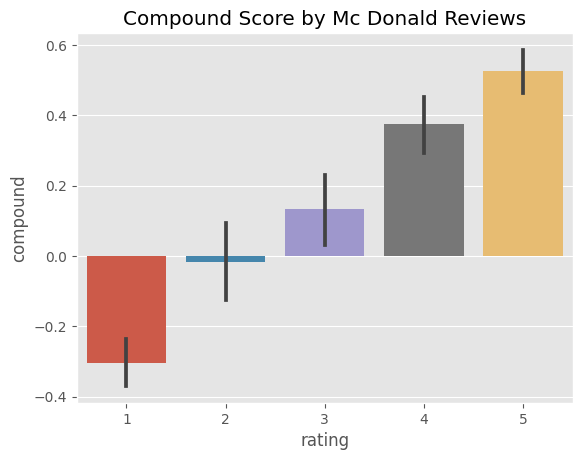

In [29]:
#Plot vaders result
ax = sns.barplot(data = vaders, x = 'rating', y ='compound')
ax.set_title("Compound Score by Mc Donald Reviews")
plt.show()

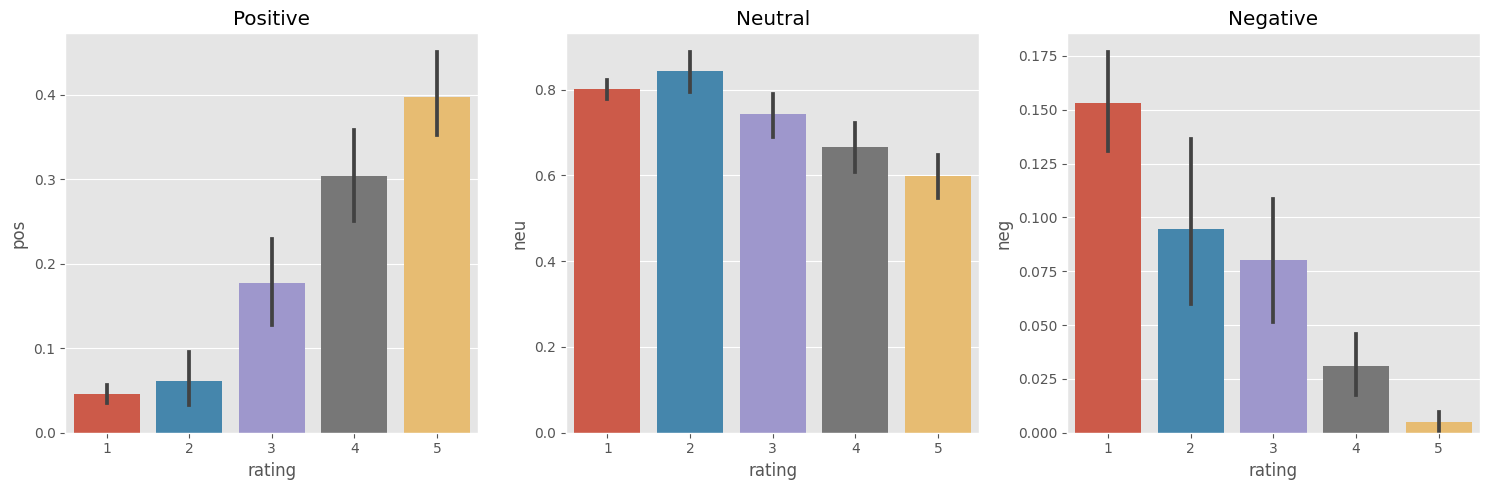

In [33]:
fig, axs = plt.subplots (1, 3, figsize = (15,5))
sns.barplot(data = vaders, x = 'rating', y ='pos',ax =  axs[0])
sns.barplot(data = vaders, x = 'rating', y ='neu',ax =  axs[1])
sns.barplot(data = vaders, x = 'rating', y ='neg',ax =  axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Roberta Pretrained Model
Using a model trained of large corpus of data
Transformer model accounts for context related to other words


In [38]:
!pip install scipy

In [52]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification


In [63]:
from scipy.special import softmax

import numpy as np


In [53]:
model = f'cardiffnlp/twitter-roberta-base-sentiment-latest'
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForSequenceClassification.from_pretrained(model)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [54]:
# Vader result on example
print(example)
sia.polarity_scores(example)

Rude customer service, unprofessional attitude, overcooked food, no complimentary items for screwing up our orders. I don't understand how you can keep your job when there is so many negative reviews. I vow to never eat here again. I would rather eat a cold can of baked beans...


{'neg': 0.26, 'neu': 0.687, 'pos': 0.052, 'compound': -0.888}

In [56]:
# Run for Roberta model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[ 2.5837, -0.4168, -2.5779]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [64]:
scores = output[0][0].detach().numpy()

In [66]:
scores = softmax(scores)
scores

array([0.5566986 , 0.2262727 , 0.21702856], dtype=float32)

In [68]:
scores_dict = {
    "roberta_neg" : scores[0],
    "roberta_neu" : scores[1],
    "roberta_pos" : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.5566986, 'roberta_neu': 0.2262727, 'roberta_pos': 0.21702856}


In [69]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
     "roberta_neg" : scores[0],
    "roberta_neu" : scores[1],
    "roberta_pos" : scores[2]
    }
    return scores_dict

In [86]:
res = {} #dictionary to store the result
for i, row in tqdm(df.iterrows(), total = len(df)):
    try:
        text = row['review']
        myid = row['reviewer_id']
        vader_result = sia.polarity_scores(text)  
        vader_result_rename = {}
        for key, value in  vader_result.items():
            vader_result_rename[f'vader_{key}'] = value

        roberta_result = polarity_scores_roberta(text)

        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError: #ignore error on tensor 674, 514 this time
        print(f'Broke for id {myid}')
    

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 63
Broke for id 75


In [87]:
result_df = pd.DataFrame(res).T
result_df = result_df.reset_index().rename(columns = {'index' : 'reviewer_id'})
result_df = result_df.merge(df, how='left')

In [88]:
result_df.head()

,reviewer_id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,0.027,0.879,0.094,0.5215,0.921713,0.069447,0.008840,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1
1,2,0.000,0.791,0.209,0.8687,0.009263,0.030220,0.960517,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4
2,3,0.051,0.949,0.000,-0.3535,0.316454,0.644035,0.039511,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1
3,4,0.000,1.000,0.000,0.0000,0.059305,0.407701,0.532994,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5
4,5,0.143,0.857,0.000,-0.8020,0.921453,0.071842,0.006705,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1


# Compare Scores between models 

In [89]:
result_df.columns

Index(['reviewer_id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'store_name', 'category',
       'store_address', 'latitude ', 'longitude', 'rating_count',
       'review_time', 'review', 'rating'],
      dtype='object')

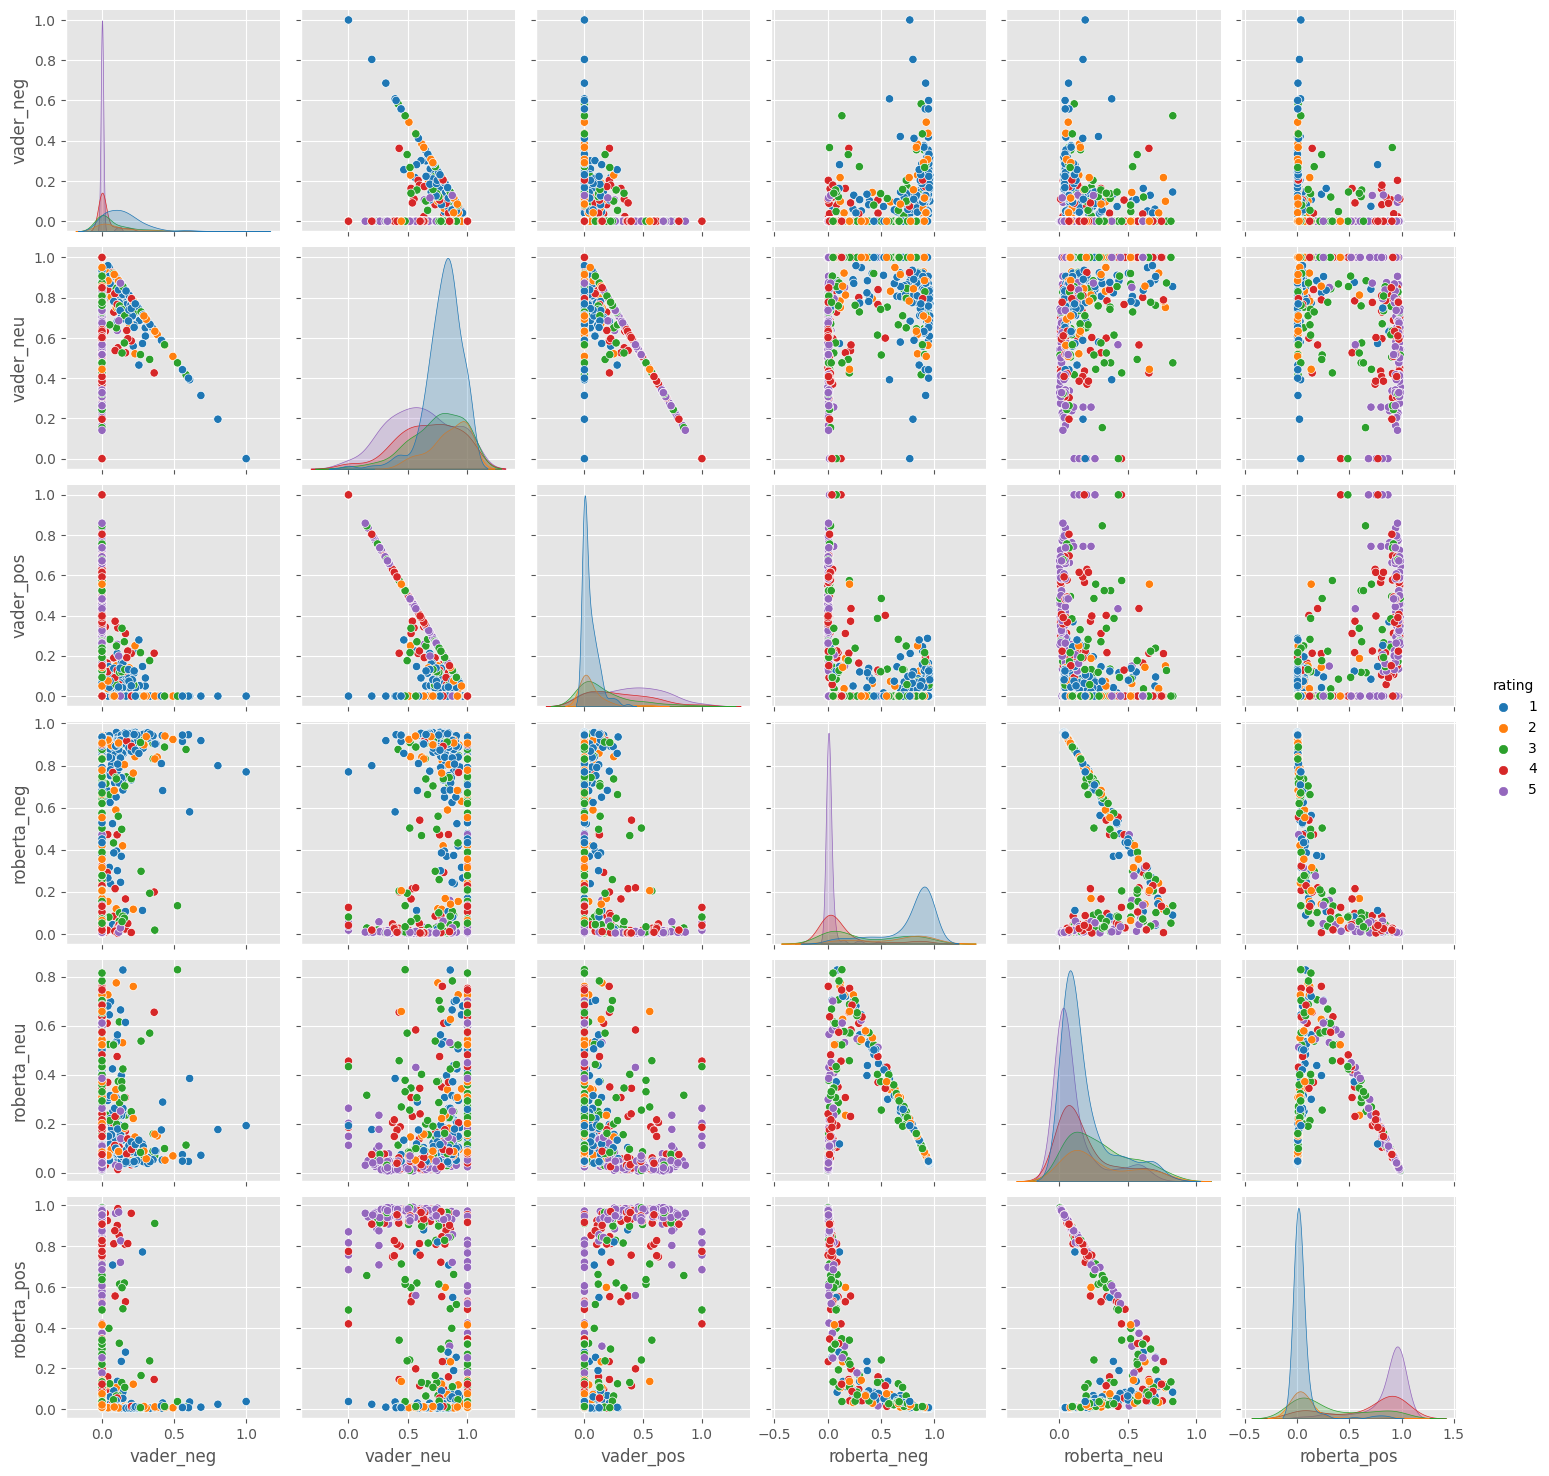

In [90]:
sns.pairplot(data = result_df, 
             vars=['vader_neg', 'vader_neu', 'vader_pos',
       'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue = 'rating',
            palette = 'tab10')
plt.show()

# Review Examples 

In [92]:
#find the most positive sentiment 1-Star
result_df.query('rating == 1')\
.sort_values('roberta_pos', ascending=False)['review'].values[0]

'Staff is great ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½  except for the Fat m'

In [93]:
result_df.query('rating == 1')\
.sort_values('vader_pos', ascending=False)['review'].values[0]

'Staff is great ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½  except for the Fat m'

In [100]:
# the most negative sentiment 5-Stars
result_df.query('rating == 5')\
.sort_values('roberta_neg', ascending=False)['review'].values[0]

'Dine in is temporarily closed here we have only take out option...'

In [99]:
result_df.query('rating == 5')\
.sort_values('vader_neg', ascending=False)['review'].values[0]

'Go here for their drinks all the time. Only complaint they need to empty their drive through trash can more often otherwise the service is amazing.'

# The transformer Pipeline

In [102]:
from transformers import pipeline

In [104]:
sent_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [105]:
sent_pipeline ('I love transformer models')

[{'label': 'POSITIVE', 'score': 0.9997031092643738}]

In [106]:
sent_pipeline ('It takes time until to be a master')

[{'label': 'NEGATIVE', 'score': 0.8843387961387634}]